In [19]:
import os
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [20]:
df = pd.read_csv("BatEngg (13).csv")
df = df.drop(columns = ['MatchDate'])

In [21]:
df.columns

Index(['ID', 'GameFormat', 'BattingInnings', 'TossResult', 'MatchTime',
       'isTossWon', 'Fantasy', 'Prev5AvgTeamRuns', 'Prev5AvgOppRuns',
       'Prev5AvgTeamWickets', 'Prev5AvgOppWickets', 'Prev5AvgSR', 'Prev5Outs',
       'Prev5Runs', 'Prev5Sixes', 'Prev5Fours', 'Prev5WL', 'isHomeGround',
       'GroundID', 'Latitude', 'Longitude', 'GroundWL', 'GroundRPO',
       'GroundAvg', 'TossWL', 'TossRPO', 'TossAvg', 'inningsWL', 'inningsRPO',
       'inningsAverage', 'Average', 'Innings', 'Centuries', 'Fifties', 'Zeros',
       'Consistency', 'Form', 'Venue', 'Opps', 'TotalRuns', 'Boundaries',
       'TotalOuts', 'BoundaryPercentage', 'TotalSixes', 'TotalFours',
       'MaxTemp', 'MinTemp', 'RainProb', 'MaxWind', 'WeatherCode',
       'Tournament', 'BattingOrder', 'Role', 'Country', 'Batting Hand', 'Age'],
      dtype='object')

In [22]:
df

,ID,GameFormat,BattingInnings,TossResult,MatchTime,isTossWon,Fantasy,Prev5AvgTeamRuns,Prev5AvgOppRuns,Prev5AvgTeamWickets,...,MinTemp,RainProb,MaxWind,WeatherCode,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,44828,6,2,bat,day,0,77,0.000000,0.000000,0.000000,...,16.5,0.0,24.5,2.0,Other,1,BAT,South Africa,RHB,23
1,44828,6,1,bat,night,1,-4,169.000000,170.000000,7.000000,...,20.3,0.0,28.6,2.0,Other,1,BAT,South Africa,RHB,23
2,44828,6,2,bat,night,0,30,152.500000,150.000000,5.500000,...,17.3,0.0,26.7,1.0,Other,1,BAT,South Africa,RHB,23
3,44828,6,1,field,night,0,2,170.666667,159.666667,7.000000,...,10.9,0.0,16.8,3.0,Other,1,BAT,South Africa,RHB,23
4,44828,6,1,field,night,0,168,171.500000,163.500000,6.500000,...,16.2,0.0,19.9,3.0,Other,1,BAT,South Africa,RHB,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,595978,6,2,bat,daynight,0,19,140.966667,165.066667,6.666667,...,14.4,0.3,10.4,51.0,SA20,3,BAT,South Africa,RHB,25
15943,600498,6,2,bat,daynight,0,10,141.343750,163.812500,6.437500,...,14.4,0.3,10.4,51.0,SA20,2,ALL,South African,RHB,31
15944,820351,6,2,field,night,1,129,162.233333,176.400000,6.200000,...,19.1,0.0,18.6,3.0,T20 Tournament,2,BAT,West Indies,RHB,32
15945,974087,6,1,field,night,0,5,175.500000,179.000000,7.000000,...,19.1,0.0,18.6,3.0,T20 Tournament,1,WK,Afghanistan,RHB,24


In [23]:
y = df["Fantasy"]
df.drop("Fantasy", axis = 1, inplace = True)

In [24]:
y = pd.DataFrame(y)

In [25]:
categorical_columns = ['TossResult', 'MatchTime', 'Tournament', 'Role', 'Batting Hand', 'Country']
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store the encoder for the column

In [26]:
y

,Fantasy
0,77
1,-4
2,30
3,2
4,168
...,...
15942,19
15943,10
15944,129
15945,5


In [27]:
df.columns

Index(['ID', 'GameFormat', 'BattingInnings', 'TossResult', 'MatchTime',
       'isTossWon', 'Prev5AvgTeamRuns', 'Prev5AvgOppRuns',
       'Prev5AvgTeamWickets', 'Prev5AvgOppWickets', 'Prev5AvgSR', 'Prev5Outs',
       'Prev5Runs', 'Prev5Sixes', 'Prev5Fours', 'Prev5WL', 'isHomeGround',
       'GroundID', 'Latitude', 'Longitude', 'GroundWL', 'GroundRPO',
       'GroundAvg', 'TossWL', 'TossRPO', 'TossAvg', 'inningsWL', 'inningsRPO',
       'inningsAverage', 'Average', 'Innings', 'Centuries', 'Fifties', 'Zeros',
       'Consistency', 'Form', 'Venue', 'Opps', 'TotalRuns', 'Boundaries',
       'TotalOuts', 'BoundaryPercentage', 'TotalSixes', 'TotalFours',
       'MaxTemp', 'MinTemp', 'RainProb', 'MaxWind', 'WeatherCode',
       'Tournament', 'BattingOrder', 'Role', 'Country', 'Batting Hand', 'Age'],
      dtype='object')

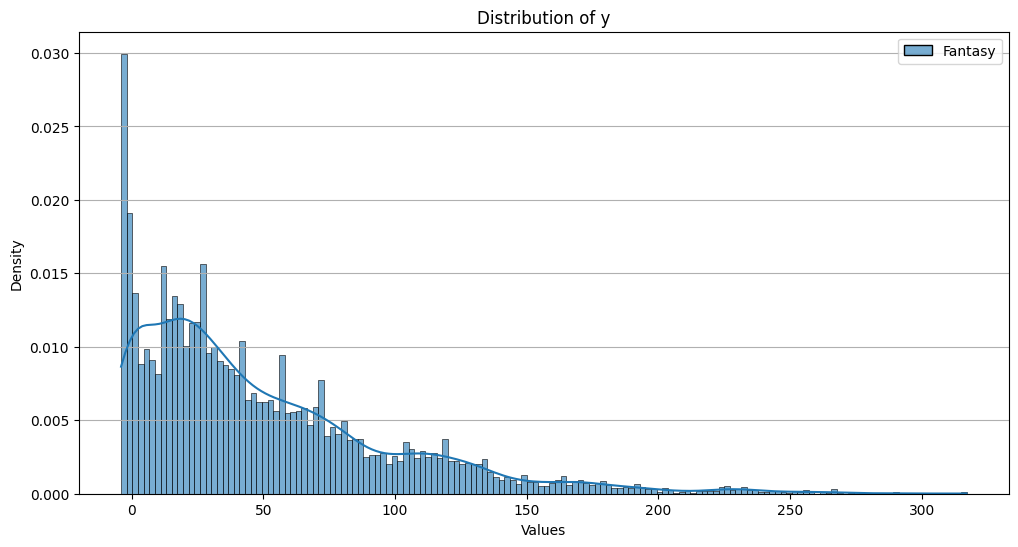

In [71]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(y, bins=150, kde=True, color='blue', stat='density', alpha=0.6)

# Adding titles and labels
plt.title('Distribution of y')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(axis='y')

# Show the plot
plt.show()

In [29]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# x_resampled, y_resampled = smote.fit_resample(df, y)
# x_resampled

print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
ID                       int64
GameFormat               int64
BattingInnings           int64
TossResult               int64
MatchTime                int64
isTossWon                int64
Prev5AvgTeamRuns       float64
Prev5AvgOppRuns        float64
Prev5AvgTeamWickets    float64
Prev5AvgOppWickets     float64
Prev5AvgSR             float64
Prev5Outs              float64
Prev5Runs              float64
Prev5Sixes             float64
Prev5Fours             float64
Prev5WL                float64
isHomeGround             int64
GroundID                 int64
Latitude               float64
Longitude              float64
GroundWL               float64
GroundRPO              float64
GroundAvg              float64
TossWL                 float64
TossRPO                float64
TossAvg                float64
inningsWL              float64
inningsRPO             float64
inningsAverage         float64
Average                float64
Innings                  int64
Centuries   

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [31]:
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [72]:
# Create the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Optionally, you can also print feature importances
importances = model.feature_importances_
feature_names = df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Mean Squared Error: 2131.46
                Feature  Importance
50         BattingOrder    0.120325
36                Venue    0.045368
1            GameFormat    0.027095
35                 Form    0.025613
37                 Opps    0.022910
14           Prev5Fours    0.022390
27           inningsRPO    0.021874
40            TotalOuts    0.021747
31            Centuries    0.020956
25              TossAvg    0.020665
26            inningsWL    0.020412
13           Prev5Sixes    0.020247
48          WeatherCode    0.020085
24              TossRPO    0.019778
54                  Age    0.019461
21            GroundRPO    0.019235
15              Prev5WL    0.019152
34          Consistency    0.018890
12            Prev5Runs    0.018783
38            TotalRuns    0.018465
46             RainProb    0.018298
47              MaxWind    0.018147
17             GroundID    0.018054
49           Tournament    0.017977
23               TossWL    0.017867
33                Zeros    0.017719


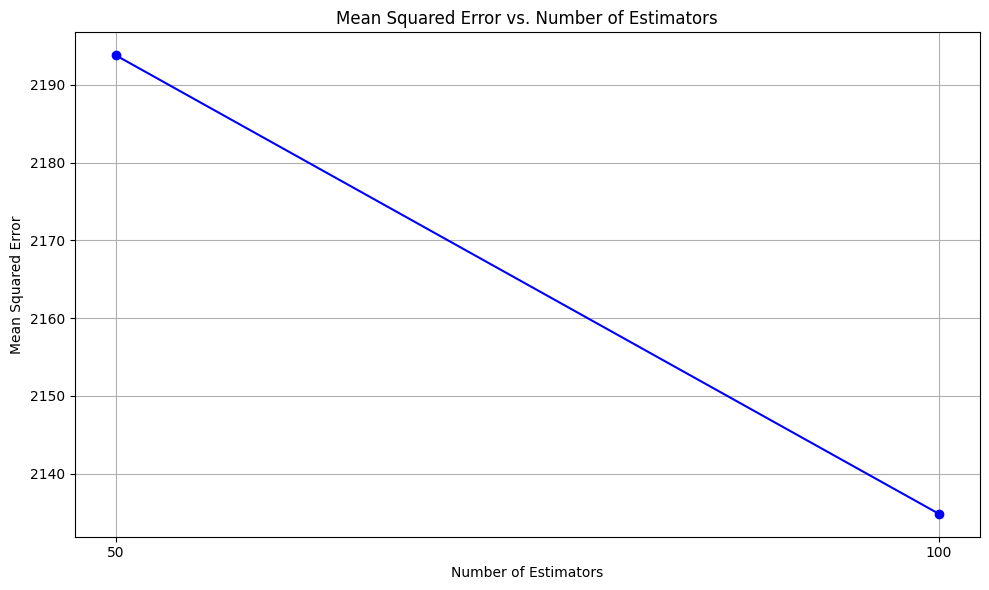

In [63]:
def custom_loss(y_true, y_pred):
    """
    Custom loss function for XGBoost.
    """
    # Initialize gradients and hessians
    grad = np.zeros_like(y_pred)
    hess = np.zeros_like(y_pred)

    for i in range(len(y_true)):
        if y_pred[i] > 100 and y_true[i] > y_pred[i]:
            # If actual is greater than predicted and predicted is greater than 100, set loss to zero
            grad[i] = 0
            hess[i] = 1  # Hessian can be a small positive value
        else:
            # Calculate the gradient and hessian normally
            grad[i] = y_pred[i] - y_true[i]  # Gradient as the difference
            hess[i] = 1  # Hessian can be a small positive value

    return grad, hess

# Define a range of number of estimators to test
n_estimators_range = range(50, 101, 50)  # Testing from 50 to 300 in steps of 50
mse_values = []  # To store MSE for each number of estimators

# Loop through the range of estimators
for n_estimators in n_estimators_range:
    # Create the XGBoost regressor with the current number of estimators
    model = xgb.XGBRegressor(objective=custom_loss, n_estimators=n_estimators, learning_rate=0.1)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the validation set
    y_validation_pred = model.predict(x_validation)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_validation, y_validation_pred)
    mse_values.append(mse)  # Store the MSE

# Plotting the MSE against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o', color='blue')
plt.title('Mean Squared Error vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.xticks(n_estimators_range)  # Set x-ticks to the range of estimators
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [73]:
mse_values

[2193.8203125, 2134.83154296875]

In [74]:
y_train_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Training Loss: {mse}")

Training Loss: 1346.060791015625


In [75]:
y_validation_pred = model.predict(x_validation)
mse = mean_squared_error(y_validation, y_validation_pred)
print(f"Validation Loss: {mse}")

Validation Loss: 2127.793701171875


In [76]:
y_test_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Testing Loss: {mse}")

Testing Loss: 2131.460205078125


In [77]:
y_test = y_test.to_numpy()
# y_pred = y_pred.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

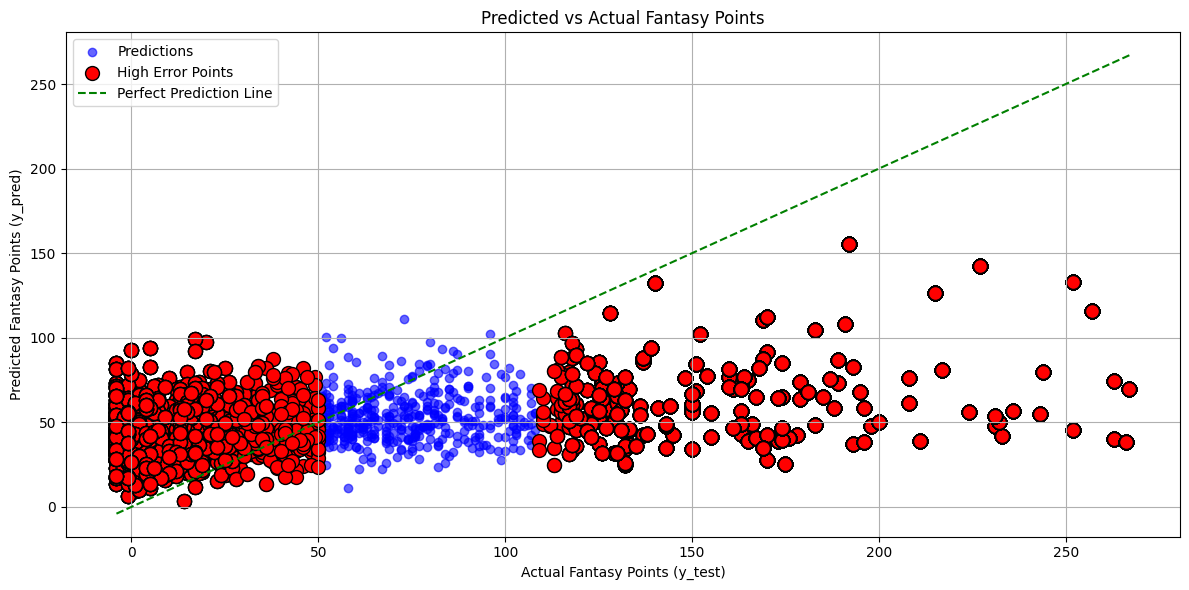

In [79]:
# Calculate the errors
errors = np.abs(y_test - y_pred)

# Define a threshold for the highest errors (e.g., top 10% of errors)
threshold = np.percentile(errors, 95)  # Adjust the percentile as needed

# Identify points with the highest errors
high_error_indices = np.where(errors > threshold)[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Predictions', color='blue', alpha=0.6)
plt.scatter(y_test[high_error_indices], y_pred[high_error_indices], 
            color='red', label='High Error Points', s=100, edgecolor='black')

# Plotting the line of perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='green', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Fantasy Points')
plt.xlabel('Actual Fantasy Points (y_test)')
plt.ylabel('Predicted Fantasy Points (y_pred)')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Remove the rows corresponding to the high error indices
cleaned_df = df[~df.index.isin(high_error_indices)]

# Save the cleaned DataFrame to a new CSV file
new_csv_path = 'BatEngg (12).csv'  # Specify your output file path
cleaned_df.to_csv(new_csv_path, index=False)

print(f"Cleaned CSV file created at: {new_csv_path}")

In [18]:
import pandas as pd

# Load the first CSV file (file1.csv) to get the IDs
file1_path = 'top_performers_batting.csv'  # Replace with your actual file path
file1_df = pd.read_csv(file1_path)

# Load the second CSV file (file2.csv) to filter entries
file2_path = 'BatEngg (13).csv'  # Replace with your actual file path
file2_df = pd.read_csv(file2_path)

# Check if 'ID' column exists in file1_df
if 'ID' not in file1_df.columns:
    print("'ID' column not found in file1.csv.")
else:
    # Extract the IDs from file1
    ids_to_keep = file1_df['ID'].unique()  # Get unique IDs

    # Filter file2_df to keep only entries with the given IDs
    filtered_df = file2_df[file2_df['ID'].isin(ids_to_keep)]

    # Save the filtered DataFrame to a new CSV file
    filtered_file_path = 'BatEngg (13).csv'  # Specify your output file path
    filtered_df.to_csv(filtered_file_path, index=False)

    print(f"Filtered entries have been saved to {filtered_file_path}")

Filtered entries have been saved to BatEngg (13).csv
